Global city network index calculation

In [3]:
import pandas as pd

# Specify the path to the Excel file to be opened.
file_path = "Global2019.xlsx"

# Specify the name of the worksheet to be accessed.
sheet_name_global = "Global"  
sheet_name_internal = "Internal" 
sheet_name_international = "International" 

# Use pandas to read the contents of the worksheet and convert it into a DataFrame.
df_international = pd.read_excel(file_path, sheet_name=sheet_name_international)


In [4]:
import pandas as pd
import networkx as nx
import networkx as nx
import community
import pandas as pd

# Create an undirected graph from a DataFrame.
G = nx.Graph()

# Add weighted edges to the graph.
for _, row in df_international.iterrows():
    G.add_edge(row['Depart'], row['Arrival'], weight=row['Weight'])

# Calculate the degree of nodes in the graph.
degrees = dict(G.degree())

# Calculate the strength, which is the sum of edge weights connected to a node.
strengths = dict(G.degree(weight='weight'))

# Calculate the betweenness centrality.
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Calculate the eigenvector centrality.
eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight')

# Calculate closeness centrality.
closeness_centrality = nx.closeness_centrality(G)

# Calculate PageRank.
pagerank = nx.pagerank(G, weight='weight')

# Run the Louvain algorithm for community detection.
partition = community.best_partition(G, weight='weight')

# Calculate the modularity value.
modularity = community.modularity(partition, G)

# Create a DataFrame to store node and community information.
node_names = list(G.nodes())

# Store the computed metrics in a DataFrame.
result_df = pd.DataFrame({
    'Node': list(G.nodes()),
    'Degree': [degrees[node] for node in G.nodes()],
    'Strength': [strengths[node] for node in G.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in G.nodes()],
    'closeness_centrality': [closeness_centrality[node] for node in G.nodes()],
    'PageRank': [pagerank[node] for node in G.nodes()],
    'Community': [partition[node] for node in node_names]
})

print("Modularity：", modularity)
result_df

,Node,Degree,Strength,Betweenness Centrality,Eigenvector Centrality,closeness_centrality,PageRank,Community
0,SEL,158,190988,0.019266,8.743394e-02,0.456258,0.012815,0
1,SFO,45,36948,0.000000,3.639970e-02,0.418769,0.002277,1
2,TYO,116,134947,0.023541,9.477956e-02,0.444986,0.008032,0
3,YVR,63,46330,0.020914,2.278846e-02,0.407605,0.003259,1
4,HKG,149,183557,0.016386,1.087160e-01,0.453582,0.011482,0
...,...,...,...,...,...,...,...,...
1382,VAS,2,6,0.000000,1.102000e-06,0.302076,0.000109,2
1383,MSR,2,4,0.000000,7.346666e-07,0.302076,0.000109,2
1384,KJT,2,3,0.000000,4.311057e-07,0.302076,0.000109,2
1385,ERC,2,2,0.013476,3.673333e-07,0.302076,0.000108,2


Global City Network secondary community network

In [ ]:
import pandas as pd

# Specify the path to the Excel file you want to open.
file_path = "Community_flights.xlsx" # Community0(2,6,8,11,13)_flights.xlsx

# Specify the name of the worksheet you want to access.
sheet = "Sheet1"  

# Use pandas to read the contents of the worksheet and convert it into a DataFrame.
df_commmunity = pd.read_excel(file_path, sheet_name=sheet)

In [ ]:
import pandas as pd
import networkx as nx
import community  # This is the "python-louvain" package, used for the Louvain algorithm.

# Read the specified worksheet data
data = df_commmunity  

# Create an undirected graph
G = nx.Graph()

# Add nodes and edges.
for index, row in data.iterrows():
    G.add_edge(row["Depart"], row["Arrival"], weight=row["FREQ2019"])

# Perform community detection using the Louvain algorithm.
partition = community.best_partition(G)

# Store the community results in the node attributes.
for node, community_id in partition.items():
    G.nodes[node]["community"] = community_id

# Print each node and its corresponding community.
for node, community_id in partition.items():
    print(f"Node: {node}, Community: {community_id}")

# Create a DataFrame to store node and community information.
node_community_df = pd.DataFrame(partition.items(), columns=["Node", "Community"])

# Write the DataFrame to an Excel file.
node_community_df.to_excel("node_community.xlsx", index=False)

Global City Network six major communities

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Specify the Excel file path you want to open.
file_path = "Global_Cities_Data.xlsx"

# Specify the name of the worksheet you want to access.
sheet_name_community0 = "0"  
sheet_name_community2 = "2"
sheet_name_community6 = "6" 
sheet_name_community8 = "8" 
sheet_name_community11 = "11" 
sheet_name_community13 = "13" 

# Use pandas to read the contents of the worksheet and convert it into a DataFrame.
df_community0 = pd.read_excel(file_path, sheet_name=sheet_name_community0)
df_community2 = pd.read_excel(file_path, sheet_name=sheet_name_community2)
df_community6 = pd.read_excel(file_path, sheet_name=sheet_name_community6)
df_community8 = pd.read_excel(file_path, sheet_name=sheet_name_community8)
df_community11 = pd.read_excel(file_path, sheet_name=sheet_name_community11)
df_community13 = pd.read_excel(file_path, sheet_name=sheet_name_community13)

# Sample data, where each group of data represents the network strength of cities in different continents.
community0_network_strengths = df_community0['GCI']
community2_network_strengths = df_community2['GCI']
community6_network_strengths = df_community6['GCI']
community8_network_strengths = df_community8['GCI']
community11_network_strengths = df_community11['GCI']
community13_network_strengths = df_community13['GCI']

data1 = community0_network_strengths
data2 = community2_network_strengths
data3 = community6_network_strengths
data4 = community8_network_strengths
data5 = community11_network_strengths 
data6 = community13_network_strengths 

Global City Network community classification of city GCI Kernel Density Estimation

C:\Users\Dell\AppData\Local\Temp\ipykernel_25684\47117780.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(community11_network_strengths, common_norm=True, shade=True, color="green", label="A")
C:\Users\Dell\AppData\Local\Temp\ipykernel_25684\47117780.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(community0_network_strengths, common_norm=True, shade=True, color="purple", label="B")
C:\Users\Dell\AppData\Local\Temp\ipykernel_25684\47117780.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(community2_network_strengths,  common_norm=True, shade=True, color="blue", label="C")
C:\Users\Dell\AppData\Local\Te

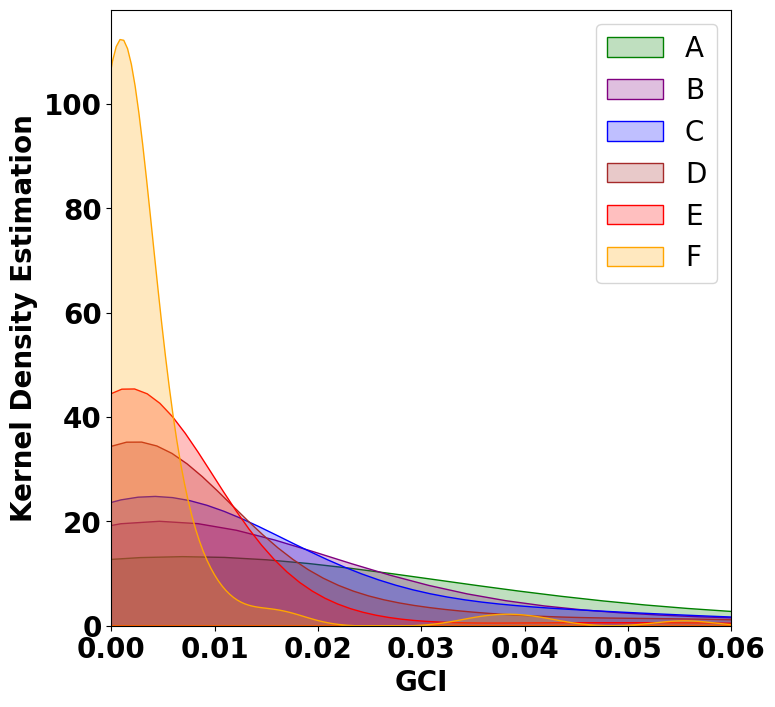

In [2]:
# Plotting a community kernel density curve chart.
# Create a canvas and axes.
plt.figure(figsize=(8, 8))
ax=plt.gca()
ax.set_facecolor('white')
ax.grid(False)

# Add a black border.
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

ax = sns.kdeplot(community11_network_strengths, common_norm=True, shade=True, color="green", label="A")
sns.kdeplot(community0_network_strengths, common_norm=True, shade=True, color="purple", label="B")
sns.kdeplot(community2_network_strengths,  common_norm=True, shade=True, color="blue", label="C")
sns.kdeplot(community6_network_strengths, common_norm=True, shade=True, color="brown", label="D")
sns.kdeplot(community8_network_strengths, common_norm=True, shade=True, color="red", label="E")
sns.kdeplot(community13_network_strengths, common_norm=True, shade=True, color="orange", label="F")
# Set the title and labels.
plt.xlabel("GCI", fontsize=20, fontweight='bold')
plt.ylabel("Kernel Density Estimation", fontsize=20, fontweight='bold')


# Set the font size of the tick labels.
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

# Set the x-axis range to start from zero.
plt.xlim(0,0.06)

# Add horizontal reference lines.
plt.axhline(0, color='black', linewidth=0.5)

# Add a legend.
plt.legend(fontsize=20)

# Display the chart.
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_29232\650942365.py:40: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


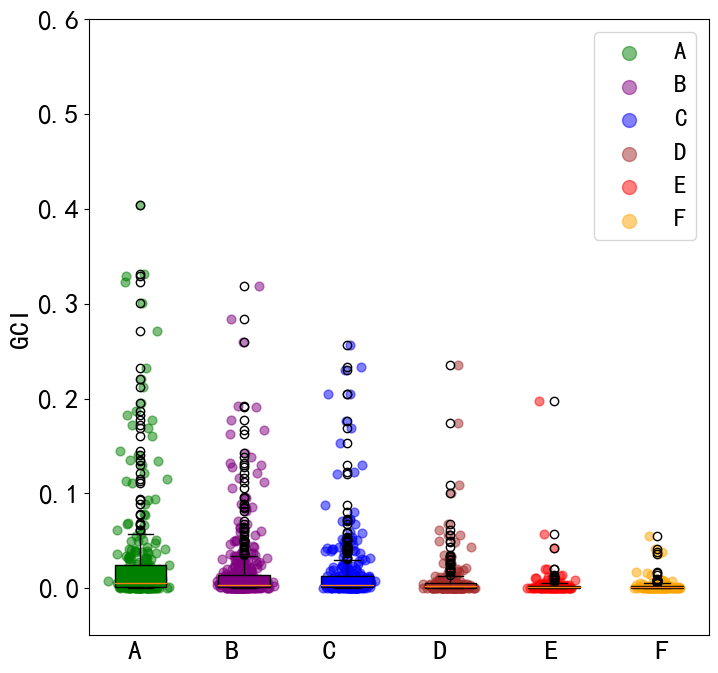

In [9]:
# Create a combination of box plot and scatter plot.
# Create a canvas and axes.
plt.figure(figsize=(8, 8))
ax=plt.gca()
ax.set_facecolor('white')
ax.grid(False)

# Add a black border.
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Create a box plot.
data=[data5, data1, data2, data3, data4, data6]
boxplot = ax.boxplot(data, vert=True, patch_artist=True)

color_red = (1.0, 0.6, 0.6, 0.5)
# Set the color and fill for the box plot.
colors = ["green", "purple","blue","brown","red","orange"]
for patch, color in zip(boxplot['boxes'],colors):
    patch.set_facecolor(color)

# Plot the scatter plot.
scatter5 = ax.scatter(np.random.normal(1, 0.1, len(data5)), data5, color='green', s=40, label='E', alpha=0.5)
scatter1 = ax.scatter(np.random.normal(2, 0.1, len(data1)), data1, color='purple', s=40, label='A', alpha=0.5)
scatter2 = ax.scatter(np.random.normal(3, 0.1, len(data2)), data2, color='blue', s=40 ,label='B', alpha=0.5)
scatter3 = ax.scatter(np.random.normal(4, 0.1, len(data3)), data3, color='brown', s=40, label='C', alpha=0.5)
scatter4 = ax.scatter(np.random.normal(5, 0.1, len(data4)), data4, color='red', s=40 ,label='D', alpha=0.5)
scatter6 = ax.scatter(np.random.normal(6, 0.1, len(data6)), data6, color='orange', s=40 ,label='F', alpha=0.5)

# Set the size of the legend items.
scatters=[scatter5, scatter1, scatter2, scatter3, scatter4,  scatter6]
legend = ax.legend(handles=[scatter5, scatter1, scatter2, scatter3, scatter4, scatter6], labels=['A','B','C','D','E','F'], fontsize=18)
for handle in legend.legendHandles:
    handle.set_sizes([100])
legend.get_frame().set_facecolor('white')

# Set the title and axis labels for the plot.
ax.set_ylabel('GCI',fontsize=20)
# Setting the font size of tick labels.
plt.yticks(fontsize=20)
plt.ylim(-0.05,0.6)
ax.set_xticks([])  # Hide Y-axis tick labels.
ax.set_xlabel('A      B      C       D       E       F',fontsize=20)
plt.xticks(fontsize=20)
# Show the plot.
plt.show()

GCI inequality in northern and southern countries

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the data from the Excel file.
excel_file = 'Global_Cities_Data.xlsx'  
sheet_name1='Ncities'
sheet_name2='Scities'
df_north = pd.read_excel(excel_file, sheet_name=sheet_name1)
df_south = pd.read_excel(excel_file, sheet_name=sheet_name2)

C:\Users\Dell\AppData\Local\Temp\ipykernel_25684\1745295916.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data1, common_norm=True, shade=True, color="red", label="N")
C:\Users\Dell\AppData\Local\Temp\ipykernel_25684\1745295916.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2,  common_norm=True, shade=True, color="green", label="S")


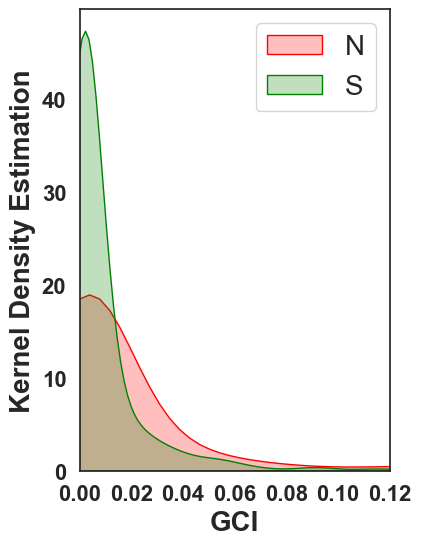

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Each dataset represents the network strength of cities in both Northern and Southern countries worldwide.
data1 = df_north['GCI'].values
data2 = df_south['GCI'].values

# Create a canvas and axes.
plt.figure(figsize=(4, 6))
ax = sns.kdeplot(data1, common_norm=True, shade=True, color="red", label="N")
sns.kdeplot(data2,  common_norm=True, shade=True, color="green", label="S")


# Set the title and labels.
plt.xlabel("GCI", fontsize=20, fontweight='bold')
plt.ylabel("Kernel Density Estimation", fontsize=20, fontweight='bold')


# Set the font size for the tick labels.
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# Set the x-axis range to start from zero.
plt.xlim(0,0.12)

# Add horizontal reference lines.
plt.axhline(0, color='white', linewidth=0)

# Use Seaborn to set the style and remove grid lines.
sns.set(style="white")

# Add a legend.
plt.legend(fontsize=20)

# Display the plot.
plt.show()

Global GCI inequality in North and South countries

In [8]:
import pandas as pd
import numpy as np

# Read data from an Excel file.
excel_file = 'Average_GCI_by_country.xlsx' 
sheet_name='Sheet1'
df = pd.read_excel(excel_file, sheet_name=sheet_name)
sheet_name1='N'
sheet_name2='S'
dfN = pd.read_excel(excel_file, sheet_name=sheet_name1)
dfS = pd.read_excel(excel_file, sheet_name=sheet_name2)

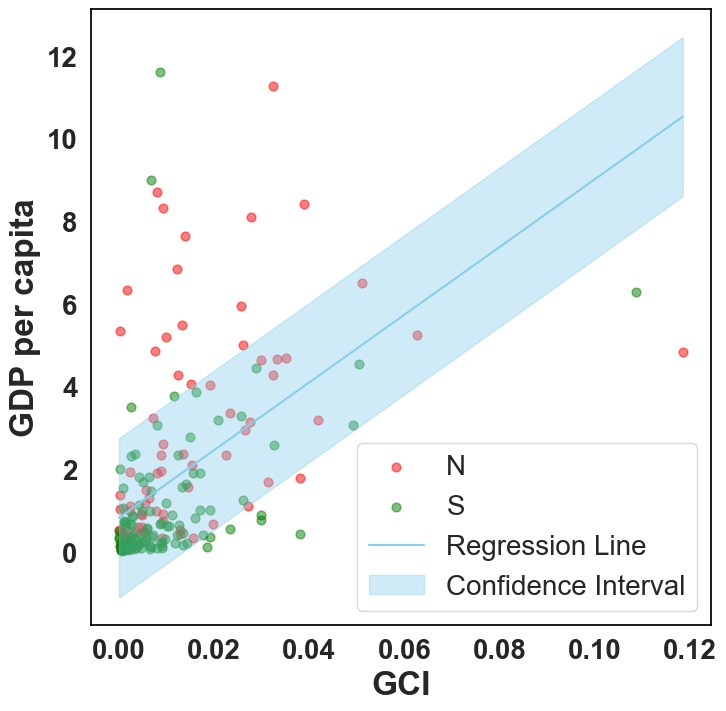

线性拟合系数 (斜率): 81.8744315798701
线性拟合系数 (截距): 0.8241304282303316
R方值: 0.2519245390853663
均方误差: 4.915286143772491
相关系数: 0.5019208494228607


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create sample data.
x= df['GCI']
y= df['Per_GDP']
x1 = dfN['GCI']
y1 = dfN['Per_GDP']
x2 = dfS['GCI']
y2 = dfS['Per_GDP']

# Perform linear regression.
coefficients = np.polyfit(x, y, 1)
y_fit = np.polyval(coefficients, x)  
noise = np.random.normal(0, 1, len(x))

# Calculate the upper and lower limits of the error band.
confidence_interval = 1.96 * np.std(noise)  # 95% Confidence interval.
upper_bound = y_fit + confidence_interval
lower_bound = y_fit - confidence_interval

# Create a canvas and axes.
plt.figure(figsize=(8, 8))
ax=plt.gca()
ax.set_facecolor('white')
ax.grid(False)

# Add a black border.
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Plot the actual data points.
lightred = (1.0, 0.6, 0.6, 0.5)
plt.scatter(x1, y1, label='N', color='red', marker='o', s=40, alpha=0.5)
plt.scatter(x2, y2, label='S', color='green', marker='o', s=40, alpha=0.5)
# Draw the regression line.
plt.plot(x, y_fit, label='Regression Line', color='skyblue')

x=np.array(x)
y=np.array(y)
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
# Obtain the regression coefficients and intercept.
slope = model.coef_[0]
intercept = model.intercept_

# Perform the fitting prediction.
y_pred = model.predict(x.reshape(-1, 1))

# Calculate the R-squared value.
r_squared = r2_score(y, y_pred)

# Calculate the mean squared error.
mse = mean_squared_error(y, y_pred)

# Calculate the correlation coefficient.
correlation_coefficient = np.corrcoef(x, y)[0, 1]

plt.fill_between(x, lower_bound, upper_bound, alpha=0.4, color='skyblue', label='Confidence Interval')
# Add a legend.
plt.legend()
# Create a legend and set the background color to white.
legend = ax.legend(fontsize=20)
legend.get_frame().set_facecolor('white')

    
# Set the font size of tick labels.
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
# Add titles and labels.
plt.xlabel('GCI', fontsize=24, fontweight='bold')
plt.ylabel('GDP per capita', fontsize=24, fontweight='bold')

# Display the graph.
plt.show()

# Print coefficients, R-squared, and mean squared error.
print("slope:", slope)
print("intercept:", intercept)
print("r_squared:", r_squared)
print("mse:", mse)
print("correlation_coefficient:", correlation_coefficient)

C:\Users\Dell\AppData\Local\Temp\ipykernel_25684\4173980337.py:40: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


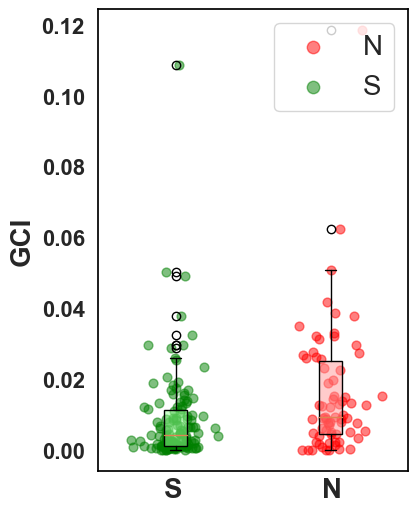

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Generate data.
data1 = dfN['GCI']
data2 = dfS['GCI']

# Create a combination of a box plot and a scatter plot.
# Create a canvas and axes.
plt.figure(figsize=(4, 6))
ax=plt.gca()
ax.set_facecolor('white')
ax.grid(False)

# Add a black border.
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Draw a scatter plot.
scatter2 = ax.scatter(np.random.normal(1, 0.1, len(data2)), data2, color='green', s=40, label='S', alpha=0.5)
scatter1 = ax.scatter(np.random.normal(2, 0.1, len(data1)), data1, color='red', s=40 ,label='N', alpha=0.5)

# Draw a box plot.
boxplot = ax.boxplot([data2, data1], vert=True, patch_artist=True)
color_red = (1.0, 0.6, 0.6, 0.5)
color_green = (0.6, 1.0, 0.6, 0.5)
# Set the color and fill of the box plot.
colors = [color_green, color_red]
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Adjust the legend item size.
legend = ax.legend(handles=[scatter1, scatter2], labels=['N', 'S'], fontsize=20, loc='upper right')
for handle in legend.legendHandles:
    handle.set_sizes([80])
legend.get_frame().set_facecolor('white')

# Set the title and axis labels of the graph.
ax.set_ylabel('GCI',fontsize=20, fontweight='bold')
# Adjust the font size of tick labels.
plt.yticks(fontsize=16, fontweight='bold')

ax.set_xticks([])  # Hide the Y-axis tick labels.
ax.set_xlabel('S                  N',fontsize=20, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
# Display the graph.
plt.show()